# Quantum Computing Introduction - Assignment 2
# Names:
# IDs:

Welcome to the second assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).


# Python environment

# Introduction to Python

This first section contains some (non specifically quantum related) questions to demonstrate your Python programming skills

## Question 1

Write a small program that accepts three integers (a, b and c) as input, and whose output is `True` only if c lies between a and b. If not, then the output should be `False`.

In [3]:
# Solution

def InBet(a, b, c):
    if a < c < b or a > c > b:
        return True
    else:
        return False


## Question 2

Write a function that, given a list of positive numbers, returns the largest number. Write a program that uses such function by: asking the user to enter the number of elements in the list, generating a list of random numbers, uses your function to obtain the largest number in the list and printing the correspoding results (both the list of numbers and the largest number in the list).

In [4]:
# Solution
from tkinter import simpledialog
import random
PrompNum = simpledialog.askinteger("Gimme a number", "Enter an integer for the amount of random numbers to generate")
RList = random.sample(range(-1000*PrompNum, 1000*PrompNum),PrompNum)
print(RList)
print(max(RList))

[-2301, -2261, 2488]
2488


## Question 3

Write a small program, using a for-loop, that given a word and a forbidden letter (provided by the user, via keyboard), tells you if the word contains the forbidden letter or not.

Please specify what a forbidden letter is next time, i will assume it means that i should notify the user when this letter is present within the given string.


In [5]:
# Solution
from tkinter import simpledialog
from tkinter import messagebox
Word = simpledialog.askstring("", "Give me a piece of text")

Forbid = "AAAAAAAA"
while len(Forbid)>1:
    Forbid = simpledialog.askstring("", "Which letter isn't allowed in it?")
    if len(Forbid)>1:
        messagebox.showinfo("","I SAID LETTER NOT WORD")

if Word.__contains__(Forbid):
    messagebox.showinfo("","Yep, thats in there alright")
else:
    messagebox.showinfo("","Nope, couldn't find it")

## Question 4

Write a function that, given a square matrix of arbitrary size as input, returns the trace of that matrix. Write a program that uses such function by: asking the user to enter the dimensions of the matrix, generating a random matrix of the requested dimensions, uses your function to compute the trace of the matrix and printing the correspoding results (both the matrix and the trace).

NB: It is not allowed to use the function numpy.trace!

In [6]:
# Solution
from tkinter import simpledialog
import random
import math

Size = simpledialog.askinteger("Gimme a number", "Enter an integer for the size of a random matrix")
RMatric = [random.sample(range(-1000*Size, 1000*Size),Size) for i in range(Size)]
print(RMatric)
output = 0
for i in range(int(len(RMatric))):
    output += RMatric[i][i]
print(output)

[[4253, -1771, -646, 2769, 493], [4533, 1745, -3280, 4126, 2963], [-1415, 4201, 643, 4465, 4269], [4548, 79, 1192, -1098, 4482], [4066, -4979, -2183, -3619, -906]]
4637


## Question 5

Write a small program to draw a scatter plot, using the mathplotlib module, to show the sea level in the past 100 years. Use the data set from: `sealevel.txt`

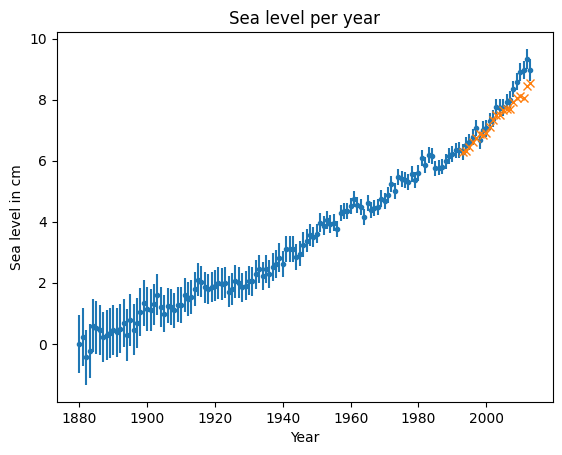

In [1]:
# Solution
import numpy as np
L = open("sealevel.txt").readlines()
SLevel = np.transpose([[float(L[i].split(',')[0]),float(L[i].split(',')[1])] for i in range(1,len(L))])
SMinMax = np.transpose([[abs(SLevel[1][i-1]-float(L[i].split(',')[2])),abs(SLevel[1][i-1]-float(L[i].split(',')[3]))] for i in range(1,len(L))])
NOOA = np.transpose([float(L[i].split(',')[4].replace('\n', '0')) for i in range(1,len(L))])

from matplotlib import pyplot as PL #yeah this code is convaluted, dont worry about it, i know this isent how im supposed to do it
NOOA[NOOA<0.001] = np.nan           #i program as a job so i got sick of not being able to shorten stuff as much as possible :)
PL.errorbar(SLevel[0], SLevel[1], yerr=SMinMax, fmt='.')
PL.errorbar(SLevel[0], NOOA, fmt='x')
PL.ylabel('Sea level in cm')
PL.xlabel("Year")
PL.title("Sea level per year")
PL.show()

## Question 6

Write a small program that, using mathplotlib, draw a line plot that shows on a daily base the highest price the DJIA reached. Use the data set from: `djia.txt`.

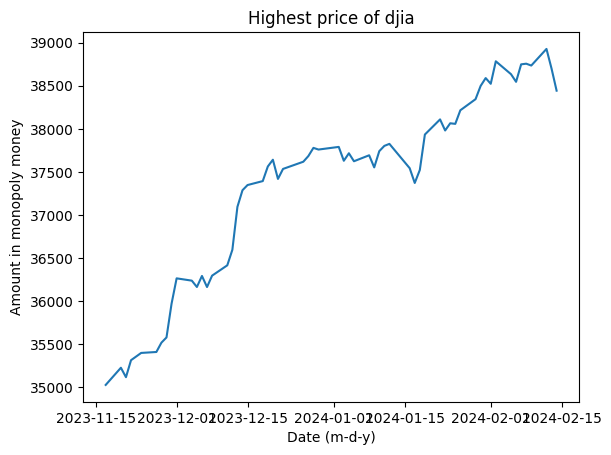

In [66]:
# Solution
import numpy as np
from datetime import datetime
L = open("djia.txt").readlines()
SLevel = np.transpose([[datetime.strptime(L[i].split(',')[0], "%m/%d/%y"),float(L[i].split(',')[2])] for i in range(1,len(L))])
from matplotlib import pyplot as PL #yeah this code is convaluted, dont worry about it, i know this isent how im supposed to do it
PL.plot(SLevel[0], SLevel[1])
PL.ylabel("Amount in monopoly money")
PL.xlabel('Date (m-d-y)')
PL.title("Highest price of djia")
PL.show()

# Introduction to Qiskit

This second section contains some exercises about single-qubit quantum circuits. The following cell contains some useful definitions and functions for the development of your assignment. They were already introduced in the Qiskit Introduction notebook and included here in case you need them.

In [85]:
# Function: state_to_dirac(quantum_state)
#
# 
# This function accepts an arbitrary state vector and prints it in its corresponding Dirac notation
def state_to_dirac(state):

    # Convert the statevector to dictionary form.
    state_to_dict = state.to_dict()

    return ' '.join('{1:+.4f}|{0}>'.format(key, value)
                      for key, value in state_to_dict.items())


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 100000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(resulting_vector)

    return resulting_vector, dirac_vector



For the first question you are going to use the `Operator (qiskit.quantum_info.Operator)` to construct the unitary matrix for a Qiskit `QuantumCircuit`, and the `Statevector (qiskit.quantum_info.Statevector)` to obtain the quantum state vector of a given circuit. It is important to point out that when using these operators, the circuit can only contain gates (e.g., no measure).

## Question 7

One of your classmates is claiming the following equivalence: `Z = HXH`. 

1. Perform the matrix operation represented by the following quantum circuit and show that, indeed, the transformation matrix correspond to the Pauli-Z matrix:
![Question1](img/qci_a2_question7.png)

2. As mentioned during the lesson, Qiskit initializes the qubits in the $\left| 0 \right\rangle$ state. However, applying the Pauli-Z gate over the $\left| 0 \right\rangle$ state does not produce an observable difference. Therefore, you have to convert the $\left| 0 \right\rangle$ state into the $\left| 1 \right\rangle$ state, then simulate a single shot of the circuit and show the resulting state vector.

3. Is it true the claim of your classmate about `Z = HXH`? Explain your reasoning.

In [139]:
# Solution
import qiskit
qc = qiskit.QuantumCircuit(1)
print(qiskit.quantum_info.Statevector(qc))
qc.h(0)
print(qiskit.quantum_info.Statevector(qc))
qc.x(0)
print(qiskit.quantum_info.Statevector(qc))
qc.h(0)
print(qiskit.quantum_info.Statevector(qc))
print(qc)
QS = qiskit.QuantumCircuit(1)
QS.x(0)
QS.h(0)
QS.x(0)
QS.h(0)
print(qiskit.quantum_info.Statevector(QS))
print(QS)
Test = qiskit.QuantumCircuit(1)
Test.x(0)
Test.z(0)
print(qiskit.quantum_info.Statevector(Test))
print(Test)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
   ┌───┐┌───┐┌───┐
q: ┤ H ├┤ X ├┤ H ├
   └───┘└───┘└───┘
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
   ┌───┐┌───┐┌───┐┌───┐
q: ┤ X ├┤ H ├┤ X ├┤ H ├
   └───┘└───┘└───┘└───┘
Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘


For the following questions you can use whatever simulator you consider useful to solve them (e.g., `Operator`, `Statevector` or `Sampler`). Read carefully the questions and identify the most suitable simulator for your purposes.


## Question 8

You have the following quantum circuit
![Question2](img//qci_a2_question8.png)

1. Adjust the circuit so that the initial state is $\left| q_{0} \right\rangle = \left| - \right\rangle$.

2. What is the resulting vector state?

3. Perform a 100000 shots simulation of the circuit and plot the resulting probabilities.

NB: Remember to use the `circuit.measure()` function to obtain the counts of the qasm simulation.

In [140]:
# Solution



## Question 9

Simulate the following quantum circuit
![Question9](img/qci_a2_question9.png)

1. Plot the initial, all the intermediate and the resulting state vectors on the Bloch sphere.

2. Imagine that you perform a 10000000 shots simulation of the proposed circuit. What probabilities would you expect to obtain? Explain why.

3. Perform a 100000 shots simulation of the proposed circuit and plot the resulting probabilities. Does the plot of the resulting probabilities match your previous answer?


In [141]:
# Solution



## Question 10

Assume the following quantum state represented in the following Bloch sphere (blue vector):
![Question10](img/qci_a2_question10.png)

1. Show the set of gates that should be applied to a initial state equals to $\left| 1 \right\rangle$ (red vector) in order to obtain the presented quantum state.

2. Plot all the intermediate states resulting of the application of the gates in your own Bloch sphere.

In [142]:
# Solution



In [143]:
print('Software version:\n')
!pip list | grep "qiskit"
!pip list | grep "IBMQuantumExperience"
!python --version

Software version:



'grep' is not recognized as an internal or external command,
operable program or batch file.
'grep' is not recognized as an internal or external command,
operable program or batch file.


Python 3.11.8
